# Coarse-graining a stiff macromolecule:

- Generate an ensemble of worm-like macromolecules

Consider a worm-like chain that is comprised of $N$ beads, $r_{i}$ with $i$ = 0, · · · , $N − 1$, or, equivalently, $N − 1$ bonds, $u_{i} = r_{i} − r_{i−1}$ with $i = 1$,··
· ,$N − 1$. The length of each bond is fixed, $\left\lvert u_{i}\right\rvert  = l_{0}$, and there acts a bond-angle potential between successive bonds along the molecular backbone. The energy of a chain configuration takes the form

$$\frac{\mathcal{H}(\{\mathbf{u}\})}{k_{\mathrm{B}} T}=-\frac{\epsilon_0}{l_0^2} \sum_{i=2}^{N-1} \mathbf{u}_i \cdot \mathbf{u}_{i-1}=-\epsilon_0 \sum_{i=2}^{N-1} \hat{\mathbf{u}}_i \cdot \hat{\mathbf{u}}_{i-1}$$



where $\hat{\mathbf{u}}_i$ denotes the direction of bond, $i$. Upon increasing the stiffness parameter, $\epsilon_0$, we favor macromolecules with straight bond angles, i.e., more extended configurations. The probability of a chain configuration, $\left\{\mathbf{u}_i\right\}$, is given by the Boltzmann weight

$$
P_0(\{\mathbf{u}\})=\frac{\exp \left(-\frac{\mathcal{H}\left(\left\{\mathbf{u}_i\right\}\right)}{k_{\mathrm{B}} T}\right)}{\mathcal{Z}}=\frac{1}{\mathcal{Z}} \delta\left(\left|\mathbf{u}_{\mathbf{1}}\right|-l_0\right) \prod_{i=2}^{N-1} e^{\frac{\epsilon_0}{l_0^2} \mathbf{u}_i \cdot \mathbf{u}_{i-1}} \delta\left(\left|\mathbf{u}_{\mathbf{i}}\right|-l_0\right)
$$
where $\mathcal{Z}$ is the normalization (denoted as partition function).


[hints: For the numerics set, $l_0=1$, i.e., measure all length scales in units of $l_0$. Use the parameters, $N=512$ and $\epsilon_0=5$, and generate $n=1048576$ independent molecular conformations.]


a) Generate a large sample of molecular configurations according to Equation 2
- Generate chain configurations by starting with $\mathbf{r}_0=\mathbf{0}$ and $\mathbf{r}_1=\mathbf{u}_1$ uniformly distributed on the sphere with radius, $l_0$. Given $\mathbf{u}_{i-1}$, the probability of $\mathbf{u}_i$ takes the form
$$\begin{aligned}
P\left(\mathbf{u}_i \mid \mathbf{u}_{i-1}\right) \mathrm{d}^3 \mathbf{u}_i & \sim e^{\epsilon_0 \cos \theta} \delta\left(\left|\mathbf{u}_i\right|-l_0^2\right) u_i^2 \mathrm{~d} u_i \mathrm{~d} \cos \theta \mathrm{d} \phi \\
& =\frac{\epsilon_0 e^{\epsilon_0 \cos \theta} \mathrm{d} \cos \theta}{2 \sinh \epsilon_0} \frac{\mathrm{d} \phi}{2 \pi}
\end{aligned}$$ 
where $\theta$ denotes the angle between $\mathbf{u}_i$ and $\mathbf{u}_{i-1}$ (or $l_0 \cos \theta$ is the projection of $\mathbf{u}_i$ onto the $\mathbf{u}_{i-1}$-axis), and $\phi$ is the rotation angle around the $\mathbf{u}_{i-1}$-axis. Describe how you generate the configurations.

- (alternative or bonus if both techniques are used) Write a Monte-Carlo simulation program that employs importance sampling of macromolecular configurations according to Equation 2. For example, use the snake algorithm  by choosing a chain end at random, and try to add a bead at the chosen end and remove a bead from the opposite end. Write down the detailed-balance condition to derive the acceptance criterion.

In [1]:
%%bash
./sgh.sh

Current time: 2023-07-06 19:55:06
/root/vsc_projects/PhyforDS/UniKurs_Phy-for-DS/Softmatter
[master fdcea90] Automated commit - 2023-07-06 19:55:06
 1 file changed, 1006 insertions(+), 1377 deletions(-)
 rewrite Softmatter/Phy8.ipynb (85%)


To https://github.com/LukasLow/UniKurs_Phy-for-DS.git
   343d221..fdcea90  master -> master


In [2]:
import numpy as np
from multiprocessing import Pool
from tqdm import tqdm
import matplotlib.pyplot as plt

def generate_configuration(_):
    # Initialize chain
    r = np.zeros((N, 3))
    u = np.zeros((N - 1, 3))

    # Generate u_1 uniformly distributed on a sphere
    theta = np.arccos(2 * np.random.random() - 1)
    phi = 2 * np.pi * np.random.random()
    u[0] = np.array([np.sin(theta) * np.cos(phi),
                     np.sin(theta) * np.sin(phi),
                     np.cos(theta)])

    # Generate subsequent bonds
    for i in range(1, N - 1):
        xi = np.random.uniform(low=0, high=1/np.sinh(epsilon_0))
        cos_theta = np.log(1 - xi * np.sinh(epsilon_0)) / epsilon_0
        theta = np.arccos(cos_theta)
        phi = 2 * np.pi * np.random.random()
        u_i = np.array([np.sin(theta) * np.cos(phi),
                        np.sin(theta) * np.sin(phi),
                        np.cos(theta)])
        u[i] = u_i

    return u


# Parameters
N = 512
epsilon_0 = 5
# sample_size = 1048576
sample_size = 10000

# Generate molecular configurations in parallel with progress bar
with Pool() as p, tqdm(total=sample_size) as pbar:
    configurations = []
    for config in p.imap_unordered(generate_configuration, range(sample_size)):
        configurations.append(config)
        pbar.update(1)

# Access individual configurations
print(configurations[0])  # Example: Print the first configuration

  0%|          | 0/10000 [00:00<?, ?it/s]/tmp/ipykernel_106380/4154302293.py:22: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(cos_theta)
/tmp/ipykernel_106380/4154302293.py:22: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(cos_theta)
/tmp/ipykernel_106380/4154302293.py:22: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(cos_theta)
/tmp/ipykernel_106380/4154302293.py:22: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(cos_theta)
/tmp/ipykernel_106380/4154302293.py:22: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(cos_theta)
/tmp/ipykernel_106380/4154302293.py:22: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(cos_theta)
/tmp/ipykernel_106380/4154302293.py:22: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(cos_theta)
/tmp/ipykernel_106380/4154302293.py:22: RuntimeWarning: invalid value encountered in arccos
  thet

[[-0.07392093  0.88820632 -0.45345918]
 [-0.4703144  -0.8510491  -0.23349473]
 [-0.62597497  0.72137718 -0.29626054]
 ...
 [-0.3064403   0.93674395 -0.16913048]
 [ 0.57960111 -0.81021812 -0.08723044]
 [ 0.95374764 -0.29871785 -0.03366139]]


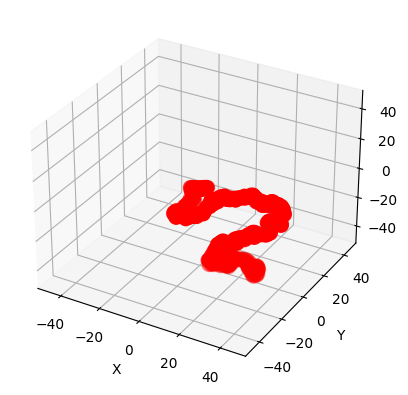

In [3]:
# Extract the positions of atoms and bond vectors
positions = np.zeros((N, 3))
bond_vectors = np.zeros((N - 1, 3))

positions[0] = np.array([0, 0, 0])
for i in range(1, N):
    bond_vectors[i - 1] = configurations[i - 1][0]  # Assign bond vector
    positions[i] = positions[i - 1] + bond_vectors[i - 1]

# Plot the molecular configuration
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot atoms
ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c='red', s=100)

# Plot bonds
for i in range(N - 1):
    start = positions[i]
    end = positions[i + 1]
    ax.plot([start[0], end[0]], [start[1], end[1]], [start[2], end[2]], color='blue')

# Set plot limits and labels
ax.set_xlim([-50, 50])
ax.set_ylim([-50, 50])
ax.set_zlim([-50, 50])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()


# New

In [4]:
import numpy as np
from multiprocessing import Pool
from tqdm import tqdm

def generate_configuration(_):
    # Initialize chain
    r = np.zeros((N, 3))
    u = np.zeros((N - 1, 3))

    # Generate u_1 uniformly distributed on a sphere
    theta = np.arccos(2 * np.random.random() - 1)
    phi = 2 * np.pi * np.random.random()
    u[0] = np.array([np.sin(theta) * np.cos(phi),
                     np.sin(theta) * np.sin(phi),
                     np.cos(theta)])

    # Generate subsequent bonds
    for i in range(1, N - 1):
        xi = np.random.uniform(low=0, high=1)
        cos_theta = 2 * xi - 1
        theta = np.arccos(cos_theta)
        phi = 2 * np.pi * np.random.random()
        u_i = np.array([np.sin(theta) * np.cos(phi),
                        np.sin(theta) * np.sin(phi),
                        np.cos(theta)])
        u[i] = u_i

    return u



# Parameters
N = 512
epsilon_0 = 5
sample_size = 1048576
# sample_size = 10000


# Generate molecular configurations in parallel with progress bar
with Pool() as p, tqdm(total=sample_size) as pbar:
    configurations = []
    for config in p.imap_unordered(generate_configuration, range(sample_size)):
        configurations.append(config)
        pbar.update(1)

# Access individual configurations
print(configurations[0])  # Example: Print the first configuration


 13%|█▎        | 131821/1048576 [01:34<10:52, 1404.44it/s]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Access the first configuration
configuration = configurations[0]

# Extract the positions of atoms and bond vectors
positions = np.zeros((N, 3))
bond_vectors = np.zeros((N - 1, 3))

positions[0] = np.array([0, 0, 0])
for i in range(1, N):
    bond_vectors[i - 1] = configuration[i - 1]
    positions[i] = positions[i - 1] + bond_vectors[i - 1]

# Plot the molecular configuration
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot atoms
ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c='red', s=100)

# Plot bonds
for i in range(N - 1):
    start = positions[i]
    end = positions[i + 1]
    ax.plot([start[0], end[0]], [start[1], end[1]], [start[2], end[2]], color='blue')

# Set plot limits and labels
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Access the first configuration
configuration = configurations[0]

# Extract the positions of atoms and bond vectors
positions = np.zeros((N, 3))
bond_vectors = np.zeros((N - 1, 3))

positions[0] = np.array([0, 0, 0])
for i in range(1, N):
    bond_vectors[i - 1] = configuration[i - 1]
    positions[i] = positions[i - 1] + bond_vectors[i - 1]

# Plot the molecular configuration
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot atoms
ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c='red', s=100)

# Plot bonds
for i in range(N - 1):
    start = positions[i]
    end = positions[i + 1]
    ax.plot([start[0], end[0]], [start[1], end[1]], [start[2], end[2]], color='blue')

# Set plot limits and labels
ax.set_xlim([-1000, 1000])
ax.set_ylim([-1000, 1000])
ax.set_zlim([-1000, 1000])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()


In [ ]:
%%bash
/root/vsc_projects/PhyforDS/UniKurs_Phy-for-DS/Softmatter/sgh.sh

In [ ]:
print(configurations[0])  # Example: Print the first configuration

In [ ]:
# Save configurations to a file
filename = "molecular_configurationsrs.npy"
np.save(filename, configurations)
print(f"Saved {len(configurations)} configurations to {filename}.")

In [ ]:
%%bash
/root/vsc_projects/PhyforDS/UniKurs_Phy-for-DS/Softmatter/sgh.sh

---------

b) Calculate averages and statistical errors of the following quantities and compare them to the exact results (where available)
- average bond-angle
$$
\langle\cos \theta\rangle=\frac{\left(\epsilon_0-1\right) e^{\epsilon_0}+\left(\epsilon_0+1\right)^{-\epsilon_0}}{2 \epsilon_0 \sinh \epsilon_0}=\frac{1-\frac{1}{\epsilon_0}+\left(1+\frac{1}{\epsilon_0}\right) e^{-2 \epsilon_0}}{1-e^{-2 \epsilon_0}}
$$
- bond-angle correlation along the macromolecule
$$
C(\Delta i)=\frac{\left\langle\mathbf{u}_i \cdot \mathbf{u}_{i+\Delta i}\right\rangle}{l_0^2}=\langle\cos \theta\rangle^{|\Delta i|}=e^{-\frac{l_0|\Delta i|}{l_p}} \quad \text { with } l_p=-\frac{l_0}{\ln \langle\cos \theta\rangle}
$$
where $l_p$ is called the persistence length.
- mean-square end-to-end distance, $\left\langle R_{\mathrm{EE}}^2\right\rangle \equiv\left\langle\left(\mathbf{r}_{N-1}-\mathbf{r}_0\right)^2\right\rangle=\left\langle\left(\sum_{i=1}^{N-1} \mathbf{u}_i\right)^2\right\rangle$
$$
\begin{aligned}
& \left\langle R_{\mathrm{EE}}^2\right\rangle=(N-1) l_0^2\left(\frac{1+\langle\cos \theta\rangle}{1-\langle\cos \theta\rangle}-\frac{2\langle\cos \theta\rangle}{N-1} \frac{1-\langle\cos \theta\rangle^{N-1}}{(1-\langle\cos \theta\rangle)^2}\right) \\
& \stackrel{l_p \gg l_0}{\approx} 2 L l_p\left(1-\frac{l_p}{L}\left[1-e^{-L / l_p}\right]\right) \\
&
\end{aligned}
$$
where $L=(N-1) l_0$ denotes the contour length of the chain molecules.



In [ ]:
import numpy as np
from scipy.spatial.transform import Rotation as R
from multiprocessing import Pool
from tqdm import tqdm
from sklearn.utils import resample

configurations = np.load("molecular_configurationsrs.npy")

print(configurations[0])  # Example: Print the first configuration

print(np.isnan(configurations).any())

# Remove all NaN in Data
mask = ~np.isnan(configurations).any(axis=(1,2))
configurations = configurations[mask]

print("Shape of the array: ", configurations.shape)

for i in range(len(configurations.shape)):
    print(f"Number of NaN values along axis {i}: ", np.isnan(configurations).sum(axis=i))


def calculate_averages(configurations):
    num_configurations = len(configurations)
    cos_thetas = []
    u_dot_u_deltas = []
    R_EE_squares = []

    # Calculate quantities for each configuration
    for config in configurations:
        # Calculate cos_theta for each bond
        cos_theta = np.sum(config[:-1] * config[1:], axis=1)
        cos_thetas.append(cos_theta)

        # Calculate u_i.u_{i+Delta_i} for each pair of bonds
        u_dot_u_delta = np.sum(config[:-2] * config[2:], axis=1)
        u_dot_u_deltas.append(u_dot_u_delta)

        # Calculate R_EE^2 for the chain
        R_EE_square = np.sum((config[-1] - config[0])**2)
        R_EE_squares.append(R_EE_square)

    cos_thetas = np.concatenate(cos_thetas)
    u_dot_u_deltas = np.concatenate(u_dot_u_deltas)

    # Calculate averages
    average_cos_theta = np.mean(cos_thetas)
    average_u_dot_u_delta = np.mean(u_dot_u_deltas)
    average_R_EE_square = np.mean(R_EE_squares)

    # Estimate errors using bootstrap resampling
    cos_theta_err = np.std(resample(cos_thetas, replace=True, n_samples=num_configurations))
    u_dot_u_delta_err = np.std(resample(u_dot_u_deltas, replace=True, n_samples=num_configurations))
    R_EE_square_err = np.std(resample(R_EE_squares, replace=True, n_samples=num_configurations))

    return average_cos_theta, cos_theta_err, average_u_dot_u_delta, u_dot_u_delta_err, average_R_EE_square, R_EE_square_err

average_cos_theta, cos_theta_err, average_u_dot_u_delta, u_dot_u_delta_err, average_R_EE_square, R_EE_square_err = calculate_averages(configurations)

print(f"Average cos(theta) = {average_cos_theta} ± {cos_theta_err}")
print(f"Average u_i.u_(i+Delta_i) = {average_u_dot_u_delta} ± {u_dot_u_delta_err}")
print(f"Average R_EE^2 = {average_R_EE_square} ± {R_EE_square_err}")


# Calculate averages and statistical errors
average_cos_theta, cos_theta_err, average_u_dot_u_delta, u_dot_u_delta_err, average_R_EE_square, R_EE_square_err = calculate_averages(configurations)

# Save results to a text file
with open('averages_and_errors.txt', 'w') as f:
    f.write(f"Average cos(theta) = {average_cos_theta} ± {cos_theta_err}\n")
    f.write(f"Average u_i.u_(i+Delta_i) = {average_u_dot_u_delta} ± {u_dot_u_delta_err}\n")
    f.write(f"Average R_EE^2 = {average_R_EE_square} ± {R_EE_square_err}\n")

print("Averages and errors have been saved to 'averages_and_errors.txt'")


In [ ]:
%%bash
/root/vsc_projects/PhyforDS/UniKurs_Phy-for-DS/Softmatter/sgh.sh

----------

c) Generate a joint sequence of the polymer's square end-to-end distance, $R_{\mathrm{EE}}^2(t)$, and the bond-angle energy, $\mathcal{H}(\{\mathbf{u}(t)\})$, according to Equation 1. $t$ denotes the index of the configuration in the sequence. Use single-histogram extrapolation
$$
\begin{aligned}
\left\langle R_{\mathrm{EE}}^2\right\rangle_{\epsilon_0^{\prime}} & =\frac{\left\langle e^{\frac{\left(\epsilon_0^{\prime}-\epsilon_0\right)}{l_0^2} \sum_i \mathbf{u}_i \cdot \mathbf{u}_{i-1}} R_{\mathrm{EE}}^2(\{\mathbf{u}\})\right\rangle_\epsilon}{\left\langle e^{\frac{\left(\epsilon_0^{\prime}-\epsilon_0\right)}{l_0^2} \sum_i \mathbf{u}_i \cdot \mathbf{u}_{i-1}}\right\rangle_\epsilon} \\
& \approx \frac{\sum_t e^{\frac{\left(\epsilon_0^{\prime}-\epsilon_0\right)}{l_0^2} \sum_i\left[\mathbf{u}_i(t) \cdot \mathbf{u}_{i-1}(t)-c\right]} R_{\mathrm{EE}}^2(\{\mathbf{u}(t)\})}{\sum_t e^{\frac{\left(\epsilon_0^{\prime}-\epsilon_0\right)}{l_0^2} \sum_i\left[\mathbf{u}_i(t) \cdot \mathbf{u}_{i-1}(t)-c\right]}}
\end{aligned}
$$
to validate your sample of generated configurations by comparing the meansquare end-to-end distance at two, neighboring values of the stiffness parameter, $\epsilon_0^{\prime}$ and $\epsilon_0$. In the last step we have approximated the integral over configuration space by the sum over the sequence. $c \approx\left\langle\mathbf{u}_i \cdot \mathbf{u}_{i-1}\right\rangle=l_0^2\langle\cos \theta\rangle$ is a constant to avoid over/underflow issues.
[hint: choose $\epsilon^{\prime}=\epsilon \pm 0.25$ ]



In [ ]:
def calculate_REE_and_H(configurations, epsilon_0, epsilon_0_prime, l_0, c):
    num_configurations = len(configurations)
    R_EE_squares = []
    Hs = []

    # Calculate quantities for each configuration
    for config in configurations:
        # Calculate R_EE^2 for the chain
        R_EE_square = np.sum((config[-1] - config[0])**2)
        R_EE_squares.append(R_EE_square)

        # Calculate bond-angle energy for the chain
        H = np.sum(config[:-1] * config[1:]) - c
        Hs.append(H)

    # Use single-histogram extrapolation to calculate <R_EE^2>_{epsilon_0'}
    exp_factor = np.exp((epsilon_0_prime - epsilon_0) / l_0**2 * np.array(Hs))
    average_REE_square_prime = np.sum(exp_factor * R_EE_squares) / np.sum(exp_factor)

    return average_REE_square_prime

In [ ]:
%%bash
/root/vsc_projects/PhyforDS/UniKurs_Phy-for-DS/Softmatter/sgh.sh

--------
- Coarse grain the macromolecular configurations
by defining new, coarse-grained bead positions and bond vectors, according to
$$
\mathbf{R}_J=\mathbf{r}_{(J+1 / 2) 2^\lambda} \quad \text { and } \quad \mathbf{U}_J=\mathbf{R}_J-\mathbf{R}_{J-1}=\sum_{i=J 2^\lambda}^{(J+1) 2^\lambda-1} \mathbf{u}_i
$$

where the degree of coarse-graining, $2^\lambda$, is a power of 2 . We seek an approximate description of these coarse-grained configurations, $\mathbf{U}_J$ with $J=1, \cdots, N_\lambda-1$ and $N_\lambda=N / 2^\lambda$, by a probability distribution of the form
$$
P_\lambda(\{\mathbf{U}\}) \sim \mathcal{L}_\lambda\left(\left|\mathbf{U}_1\right|\right) \prod_{J=2}^{N_\lambda-1} e^{\epsilon_\lambda \frac{\mathbf{U}_J \cdot \mathbf{U}_{J-1}}{\sqrt{\mathbf{U}_J^2 \mathbf{U}_{J-1}^2}}} \mathcal{L}_\lambda\left(\left|\mathbf{U}_J\right|\right)=\mathcal{L}_\lambda\left(U_1 \mid\right) \prod_{J=2}^{N_\lambda-1} e^{\epsilon_\lambda} \hat{\mathbf{U}}_J \cdot \hat{\mathbf{U}}_{J-1} \mathcal{L}_\lambda\left(U_J\right)
$$
where $\hat{\mathbf{U}}_J$ and $U_J$ are the direction and the length of the coarse-grained bond, respectively. $\mathcal{L}_\lambda(U)$ denotes the length distribution of a coarse-grained bond and it takes the form
$$
\mathcal{L}_\lambda(U) \sim e^{-\frac{3\left(U-l_\lambda\right)^2}{2 \sigma_\lambda^2}} U^2
$$
Equivalently, the coarse-grained Hamiltonian is of the form
$$
\frac{\mathcal{H}_{\mathrm{cg}}(\{\mathbf{U}\})}{k_{\mathrm{B}} T}=\sum_{J=1}^{N_\lambda-1} \frac{3\left(\left|\mathbf{U}_J\right|-l_\lambda\right)^2}{2 \sigma_\lambda^2}-\epsilon_\lambda \sum_{J=2}^{N_\lambda-1} \hat{\mathbf{U}}_J \cdot \hat{\mathbf{U}}_{J-1}
$$
Thus, the coarse-grained distribution is characterized by 3 parameters, $\epsilon_\lambda, l_\lambda$, and $\sigma_\lambda$. The original probability distribution, $P_1$ for $\lambda=1$, corresponds to $\epsilon_\lambda=\epsilon, l_\lambda=l_0$, and $\sigma_\lambda \rightarrow 0$. The goal of this second part of the exercise is to explicitly show that for $1 \ll \lambda \ll N$, the coarse-grained probability distribution is characterized by $\epsilon_\lambda \rightarrow 0$, $l_\lambda \rightarrow 0$, and $\sigma_\lambda^2 \rightarrow\left\langle R_{\mathrm{EE}}^2\right\rangle /\left(N_\lambda-1\right)$, i.e., the coarse-grained bonds are Gaussian distributed (cf. central limit theorem)
$$
\begin{aligned}
P_\lambda(\{\mathbf{U}\}) \mathrm{d}\{\mathbf{U}\} & \rightarrow \prod_{J=1}^{N_\lambda-1}\left(\frac{3\left(N_\lambda-1\right)}{2 \pi\left\langle R_{\mathrm{EE}}^2\right\rangle}\right)^{3 / 2} e^{-\frac{3\left(N_\lambda-1\right) U_J^2}{2\left\langle R_{\mathrm{EE}}^2\right\rangle}} U_J^2 \mathrm{~d} U_J \mathrm{~d} \phi_J \mathrm{~d} \cos \theta_J \\
& =\left(\frac{3\left(N_\lambda-1\right)}{2 \pi\left\langle R_{\mathrm{EE}}^2\right\rangle}\right)^{3\left(N_\lambda-1\right) / 2} e^{-\frac{3\left(N_\lambda-1\right)}{2\left\langle R_{\mathrm{EE}}^2\right\rangle} \sum_{J=1}^{N_\lambda-1} \mathbf{U}_J^2} \mathrm{~d}\{\mathbf{U}\}
\end{aligned}
$$

In [ ]:
def coarse_grain(configurations, lambda_):
    coarse_grained_configurations = []

    for config in configurations:
        N = len(config)
        N_lambda = N // 2**lambda_
        coarse_grained_config = np.zeros((N_lambda, 3))

        for J in range(N_lambda):
            coarse_grained_config[J] = np.sum(config[J*2**lambda_:(J+1)*2**lambda_], axis=0)

        coarse_grained_configurations.append(coarse_grained_config)

    return coarse_grained_configurations


In [ ]:
%%bash
/root/vsc_projects/PhyforDS/UniKurs_Phy-for-DS/Softmatter/sgh.sh

--------------
a) Calculate the length distribution, $\mathcal{L}_\lambda(U)$, of the new, coarse-grained bond vectors for various degrees of coarse-graining, $2^\lambda=(1), 2,4,8,16,32,64,128$, and determine the parameters $l_\lambda$ and $\sigma_\lambda^2$ as a function of $2^\lambda$.

In [ ]:
import scipy.stats as stats

def calculate_length_distribution(coarse_grained_configurations):
    lengths = []

    for config in coarse_grained_configurations:
        lengths.append(np.linalg.norm(config, axis=1))

    lengths = np.concatenate(lengths)

    l_lambda = np.mean(lengths)
    sigma_lambda = np.std(lengths)

    return l_lambda, sigma_lambda


In [ ]:
%%bash
/root/vsc_projects/PhyforDS/UniKurs_Phy-for-DS/Softmatter/sgh.sh

--------------
b) Calculate the coarse-grained bond-angle autocorrelation function
$$
C_\lambda(\Delta J)=\left\langle\hat{\mathbf{U}}_J \cdot \hat{\mathbf{U}}_{J+\Delta J}\right\rangle
$$
and estimate from these data the parameter $\epsilon_\lambda$.


In [ ]:
def calculate_bond_angle_autocorrelation(coarse_grained_configurations, Delta_J):
    autocorrelations = []

    for config in coarse_grained_configurations:
        N_lambda = len(config)
        autocorrelations = []

        for config in coarse_grained_configurations:
            N_lambda = len(config)
            autocorrelation = 0

            for J in range(N_lambda - Delta_J):
                u_J = config[J] / np.linalg.norm(config[J])
                u_J_plus_Delta_J = config[J + Delta_J] / np.linalg.norm(config[J + Delta_J])
                autocorrelation += np.dot(u_J, u_J_plus_Delta_J)

            autocorrelation /= (N_lambda - Delta_J)
            autocorrelations.append(autocorrelation)

    C_lambda = np.mean(autocorrelations)

    return C_lambda


In [ ]:
%%bash
/root/vsc_projects/PhyforDS/UniKurs_Phy-for-DS/Softmatter/sgh.sh

--------------
c) Graphically represent the variation of $\left(\epsilon_\lambda, l_\lambda, \sigma_\lambda^2 2^{-\lambda}\right)$ as a function of $2^{-\lambda}$-this is called the renormalization group flow.

In [ ]:
# import matplotlib.pyplot as plt

# def plot_parameters(lambdas, epsilons, l_lambdas, sigma_lambdas):
#     # Set up the figure and the subplots
#     fig, axs = plt.subplots(3, 1, figsize=(10,15))
#     fig.suptitle('Variation of parameters with degree of coarse graining')

#     # epsilon_lambda
#     axs[0].plot(lambdas, epsilons, 'o-')
#     axs[0].set_ylabel('epsilon_lambda')
#     axs[0].set_xscale('log', basex=2)  # Coarse-graining degrees are powers of 2

#     # l_lambda
#     axs[1].plot(lambdas, l_lambdas, 'o-')
#     axs[1].set_ylabel('l_lambda')
#     axs[1].set_xscale('log', basex=2)

#     # sigma_lambda
#     axs[2].plot(lambdas, sigma_lambdas, 'o-')
#     axs[2].set_ylabel('sigma_lambda^2')
#     axs[2].set_xlabel('Degree of coarse graining (2^lambda)')
#     axs[2].set_xscale('log', basex=2)

#     plt.show()

# # Then, you need to collect these parameters for various lambda
# lambdas = [2**i for i in range(8)]  # Degrees of coarse-graining
# epsilons = []
# l_lambdas = []
# sigma_lambdas = []

# for lambda_ in lambdas:
#     coarse_grained_configurations = coarse_grain(configurations, lambda_)
#     l_lambda, sigma_lambda = calculate_length_distribution(coarse_grained_configurations)
#     epsilon_lambda = calculate_bond_angle_autocorrelation(coarse_grained_configurations, Delta_J)

#     epsilons.append(epsilon_lambda)
#     l_lambdas.append(l_lambda)
#     sigma_lambdas.append(sigma_lambda**2)

# plot_parameters(lambdas, epsilons, l_lambdas, sigma_lambdas)


---------

---------

---------

---------

---------

In [ ]:
import matplotlib.pyplot as plt
from concurrent.futures import ProcessPoolExecutor
from tqdm import tqdm

# let's assume you have these lists
lambdas = [1, 2, 4, 8, 16, 32, 64, 128]  # degrees of coarse-graining

# Function to perform all calculations for a given lambda
def process_lambda(lambda_):
    # Coarse grain the configurations
    cg_configs = coarse_grain(configurations, lambda_)

    # Calculate length distribution
    l_lambda, sigma_lambda = calculate_length_distribution(cg_configs)

    # Calculate bond angle autocorrelation for Delta_J=1 and derive epsilon_lambda
    # This is a simplification, you may need a more complex procedure to estimate epsilon_lambda
    C_lambda = calculate_bond_angle_autocorrelation(cg_configs, 1)
    epsilon_lambda = -np.log(C_lambda)  # or another appropriate formula

    return epsilon_lambda, l_lambda, sigma_lambda**2

# Create a process pool and map the function to the lambdas
with ProcessPoolExecutor() as executor:
    results = list(tqdm(executor.map(process_lambda, lambdas), total=len(lambdas)))

# Unpack results
epsilons, l_lengths, sigmas_squared = zip(*results)

# Now plot epsilon_lambda, l_lambda and sigma_lambda^2 against lambda

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(lambdas, epsilons, 'o-')
plt.xlabel('Degree of coarse-graining (lambda)')
plt.ylabel('Epsilon_lambda')
plt.grid()

plt.subplot(132)
plt.plot(lambdas, l_lengths, 'o-')
plt.xlabel('Degree of coarse-graining (lambda)')
plt.ylabel('l_lambda')
plt.grid()

plt.subplot(133)
plt.plot(lambdas, sigmas_squared, 'o-')
plt.xlabel('Degree of coarse-graining (lambda)')
plt.ylabel('Sigma_lambda^2')
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

lambda_values = [1, 2, 4, 8, 16, 32, 64, 128]
epsilon_values = []
l_values = []
sigma_values = []

for lambda_ in lambda_values:
    coarse_grained_configurations = coarse_grain(configurations, lambda_)
    l_lambda, sigma_lambda = calculate_length_distribution(coarse_grained_configurations)
    C_lambda = calculate_bond_angle_autocorrelation(coarse_grained_configurations, Delta_J=1)  # Assume Delta_J=1, change as needed
    
    epsilon_lambda = -np.log(C_lambda)  # This depends on how you relate C_lambda to epsilon_lambda
    
    epsilon_values.append(epsilon_lambda)
    l_values.append(l_lambda)
    sigma_values.append(sigma_lambda**2)
    
    
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# epsilon_lambda plot
plt.subplot(1, 3, 1)
plt.plot(lambda_values, epsilon_values, marker='o')
plt.xlabel('$\lambda$')
plt.ylabel('$\epsilon_\lambda$')
plt.title('Variation of $\epsilon_\lambda$')

# l_lambda plot
plt.subplot(1, 3, 2)
plt.plot(lambda_values, l_values, marker='o')
plt.xlabel('$\lambda$')
plt.ylabel('$l_\lambda$')
plt.title('Variation of $l_\lambda$')

# sigma_lambda^2 plot
plt.subplot(1, 3, 3)
plt.plot(lambda_values, sigma_values, marker='o')
plt.xlabel('$\lambda$')
plt.ylabel('$\sigma_\lambda^2$')
plt.title('Variation of $\sigma_\lambda^2$')

plt.tight_layout()
plt.show()



In [ ]:
import matplotlib.pyplot as plt

def plot_RG_flow(lambdas, epsilons, l_lambdas, sigma_lambdas):
    x_values = 2**(-np.array(lambdas))

    plt.figure(figsize=(10, 6))

    plt.plot(x_values, epsilons, label="epsilon")
    plt.plot(x_values, l_lambdas, label="l")
    plt.plot(x_values, sigma_lambdas**2 * x_values, label="sigma^2 * 2^-lambda")

    plt.xscale('log')
    plt.yscale('log')

    plt.xlabel("2^-lambda")
    plt.ylabel("Value")

    plt.legend()

    plt.show()

import numpy as np
from multiprocessing import Pool
from tqdm import tqdm

import matplotlib.pyplot as plt

def plot_RG_flow(lambdas, epsilons, l_lambdas, sigma_lambdas):
    x_values = 1 / np.array(lambdas)  # Calculate the inverse of lambdas

    plt.figure(figsize=(10, 6))
    plt.plot(x_values, epsilons, label="epsilon")
    plt.plot(x_values, l_lambdas, label="l_lambda")
    plt.plot(x_values, sigma_lambdas, label="sigma_lambda")
    plt.xlabel("1 / lambda")
    plt.ylabel("Quantity")
    plt.legend()
    plt.show()


def calculate_quantities(lambda_):
    # Coarse grain the configurations
    coarse_grained_configurations = coarse_grain(configurations, lambda_)

    # Calculate l_lambda and sigma_lambda
    l_lambda, sigma_lambda = calculate_length_distribution(coarse_grained_configurations)

    # Calculate epsilon_lambda (autocorrelation of the unit vectors)
    # Note: you might want to choose an appropriate value for Delta_J
    Delta_J = 1

    try:
        epsilon_lambda = calculate_bond_angle_autocorrelation(coarse_grained_configurations, Delta_J)
    except ZeroDivisionError:
        epsilon_lambda = np.nan  # Assign NaN if division by zero occurs

    return epsilon_lambda, l_lambda, sigma_lambda

# This is the range of lambda values you're interested in
lambdas = range(0, 8)

# Here, I'm initializing lists to hold the calculated quantities for each lambda
epsilons = []
l_lambdas = []
sigma_lambdas = []

# Load or generate your initial polymer configurations
# configurations = ...

# Create a Pool object
with Pool() as p:
    # map applies the function to all inputs, but p.imap_unordered applies it to all inputs in parallel.
    # tqdm(list(...)) will display a progress bar for the computations.
    results = list(tqdm(p.imap(calculate_quantities, lambdas), total=len(lambdas)))

# Now, we can split the results into separate lists for each quantity
epsilons, l_lambdas, sigma_lambdas = zip(*results)

# Now you can plot the RG flow
plot_RG_flow(lambdas, epsilons, l_lambdas, sigma_lambdas)

In [ ]:
%%bash
/root/vsc_projects/PhyforDS/UniKurs_Phy-for-DS/Softmatter/sgh.sh